In [1]:
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
vocab_size = 15000  # Number of unique words to consider
embedding_dim = 128  # Dimension of the embedding layer
max_length = 200  # Maximum length of input sequences
batch_size = 64
num_epochs = 5

# Load the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Add EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=2,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore weights from the best epoch
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=2
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy:.4f}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 - 141s - 360ms/step - accuracy: 0.7592 - loss: 0.4932 - val_accuracy: 0.8308 - val_loss: 0.3870
Epoch 2/5
391/391 - 154s - 393ms/step - accuracy: 0.8623 - loss: 0.3366 - val_accuracy: 0.8510 - val_loss: 0.3485
Epoch 3/5
391/391 - 203s - 519ms/step - accuracy: 0.8918 - loss: 0.2778 - val_accuracy: 0.8625 - val_loss: 0.3406
Epoch 4/5
391/391 - 201s - 515ms/step - accuracy: 0.9160 - loss: 0.2222 - val_accuracy: 0.8462 - val_loss: 0.3926
Epoch 5/5
391/391 - 202s - 516ms/step - accuracy: 0.9219 - loss: 0.2061 - val_accuracy: 0.8410 - val_loss: 0.3872
782/782 - 31s - 39ms/step - accuracy: 0.8625 - loss: 0.3406
Test Accuracy: 0.8625


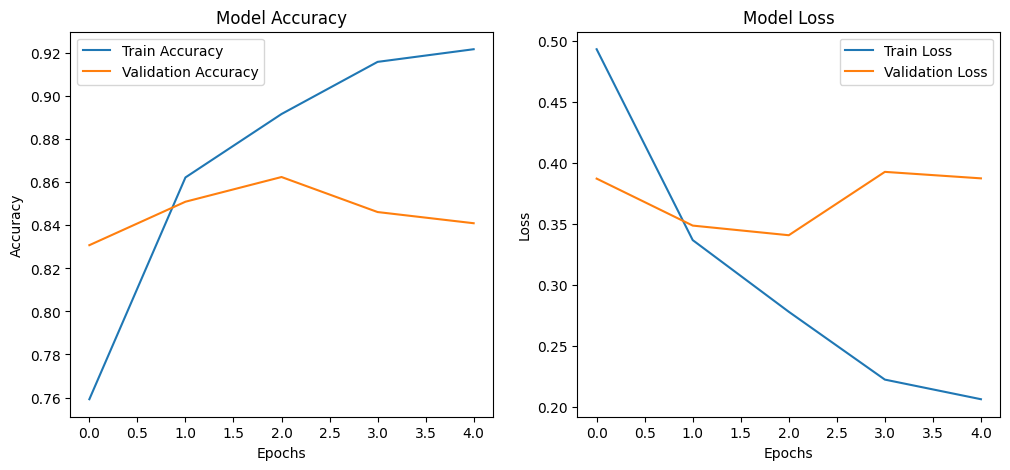

In [2]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()